In [2]:
import pandas as pd

data = {
    "Month": pd.date_range(start="2023-01-01", periods=12, freq="ME"),
    "Sales": [120, 135, 150, 160, 170, 180, 190, 210, 205, 220, 230, 240]
}

df = pd.DataFrame(data)
df


,Month,Sales
0,2023-01-31,120
1,2023-02-28,135
2,2023-03-31,150
3,2023-04-30,160
4,2023-05-31,170
5,2023-06-30,180
6,2023-07-31,190
7,2023-08-31,210
8,2023-09-30,205
9,2023-10-31,220


In [5]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(df["Sales"]).fit(smoothing_level=0.3)
df["SES_Forecast"] = ses_model.fittedvalues

print(df)


        Month  Sales  SES_Forecast
0  2023-01-31    120    120.000000
1  2023-02-28    135    120.000000
2  2023-03-31    150    124.500000
3  2023-04-30    160    132.150000
4  2023-05-31    170    140.505000
5  2023-06-30    180    149.353500
6  2023-07-31    190    158.547450
7  2023-08-31    210    167.983215
8  2023-09-30    205    180.588250
9  2023-10-31    220    187.911775
10 2023-11-30    230    197.538243
11 2023-12-31    240    207.276770


C:\Users\wscub\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

holt_model = ExponentialSmoothing(
    df["Sales"],
    trend="add",
    seasonal=None
).fit()

df["Holt_Forecast"] = holt_model.fittedvalues
df

,Month,Sales,SES_Forecast,Holt_Forecast
0,2023-01-31,120,120.000000,126.089742
1,2023-02-28,135,120.000000,136.649182
2,2023-03-31,150,124.500000,147.208622
3,2023-04-30,160,132.150000,157.768062
4,2023-05-31,170,140.505000,168.327502
5,2023-06-30,180,149.353500,178.886943
6,2023-07-31,190,158.547450,189.446383
7,2023-08-31,210,167.983215,200.005823
8,2023-09-30,205,180.588250,210.565263
9,2023-10-31,220,187.911775,221.124703


In [16]:
import pandas as pd
import numpy as np

dates = pd.date_range(start="2021-01-01", periods=36, freq="ME")

np.random.seed(42)
sales = 200 + np.arange(36)*5 + np.random.normal(0, 10, size=36)

df = pd.DataFrame({"Date": dates, "Sales": sales})

df


,Date,Sales
0,2021-01-31,204.967142
1,2021-02-28,203.617357
2,2021-03-31,216.476885
3,2021-04-30,230.230299
4,2021-05-31,217.658466
5,2021-06-30,222.658630
6,2021-07-31,245.792128
7,2021-08-31,242.674347
8,2021-09-30,235.305256
9,2021-10-31,250.425600


C:\Users\wscub\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\wscub\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\wscub\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


MAE : 22.04343424700454
RMSE: 24.777758366939327


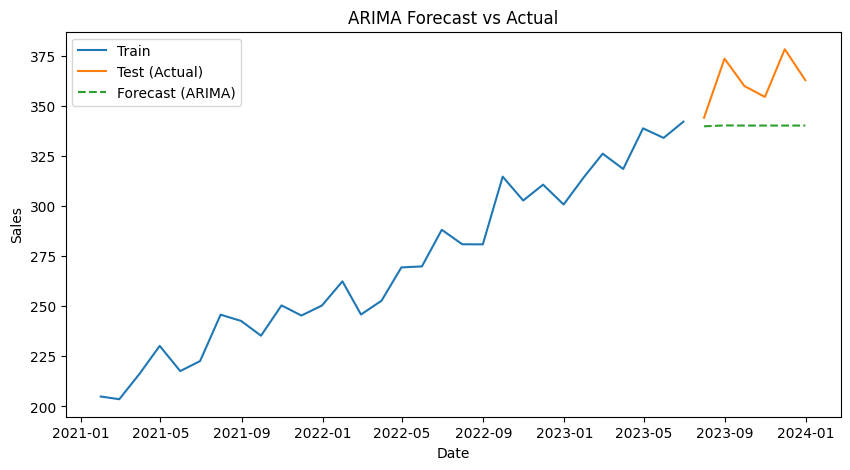


Future Forecast:
2023-07-31    339.771937
2023-08-31    340.214908
2023-09-30    340.130004
2023-10-31    340.146277
2023-11-30    340.143158
2023-12-31    340.143756
Freq: ME, Name: predicted_mean, dtype: float64


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

y = df["Sales"]


test_size = 6   
train, test = y[:-test_size], y[-test_size:]


model = ARIMA(train, order=(1, 1, 1)) #previous day, differencing, q- moving average
model_fit = model.fit()


forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)
forecast.index = test.index


mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print("MAE :", mae)
print("RMSE:", rmse)


plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test (Actual)")
plt.plot(forecast.index, forecast, label="Forecast (ARIMA)", linestyle="--")
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


future_forecast = model_fit.forecast(steps=6)
print("\nFuture Forecast:")
print(future_forecast)


C:\Users\wscub\AppData\Local\Temp\ipykernel_34440\2456989135.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2019-01-01", periods=5*12, freq="M")
C:\Users\wscub\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\wscub\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\wscub\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to es

Sample data head:
        Date       Sales
0 2019-01-31  223.973713
1 2019-02-28  215.249818
2 2019-03-31  217.893373
3 2019-04-30  221.252035
4 2019-05-31  198.550502 

Train size: 48 | Test size: 12

Model fitted.

Evaluation on Test Data:
MAE : 6.44
RMSE: 7.64


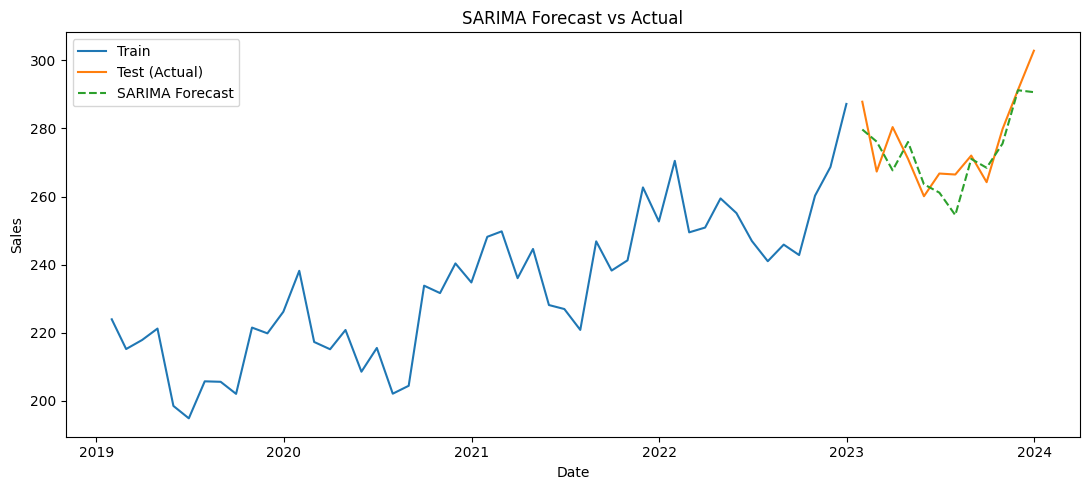


Future 12-Month Forecast:
2024-01-31    300.195452
2024-02-29    286.924230
2024-03-31    283.677979
2024-04-30    292.088592
2024-05-31    283.808210
2024-06-30    278.437054
2024-07-31    272.179056
2024-08-31    282.742579
2024-09-30    279.902989
2024-10-31    292.272139
2024-11-30    304.239216
2024-12-31    313.404787
Freq: ME, Name: predicted_mean, dtype: float64


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error


np.random.seed(42)

dates = pd.date_range(start="2019-01-01", periods=5*12, freq="M")


base = 200
trend = np.linspace(0, 80, len(dates)) 
seasonal_pattern = [20, 15, 10, 5, -5, -10, -15, -10, -5, 5, 10, 15]  
seasonality = np.tile(seasonal_pattern, 5) 
noise = np.random.normal(0, 8, len(dates))

sales = base + trend + seasonality + noise

df = pd.DataFrame({
    "Date": dates,
    "Sales": sales
})


print("Sample data head:")
print(df.head(), "\n")

df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

y = df["Sales"]

test_size = 12 
train, test = y[:-test_size], y[-test_size:]

print("Train size:", len(train), "| Test size:", len(test))


order = (1, 1, 1) #p,d,q
seasonal_order = (1, 1, 1, 12) #P, D, Q, m

model = SARIMAX(train,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)
print("\nModel fitted.")

steps = len(test)
forecast = model_fit.forecast(steps=steps)

forecast.index = test.index  

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print("\nEvaluation on Test Data:")
print("MAE :", round(mae, 2))
print("RMSE:", round(rmse, 2))


plt.figure(figsize=(11, 5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test (Actual)")
plt.plot(forecast.index, forecast, label="SARIMA Forecast", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("SARIMA Forecast vs Actual")
plt.legend()
plt.tight_layout()
plt.show()


future_steps = 12
future_forecast = model_fit.forecast(steps=steps + future_steps)
future_only = future_forecast[-future_steps:]

print("\nFuture 12-Month Forecast:")
print(future_only)


C:\Users\wscub\AppData\Local\Temp\ipykernel_24236\1666719811.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2019-01-01", periods=5*12, freq="M")


Sample data head:
                  Sales
Date                  
2019-01-31  202.483571
2019-02-28  210.156136
2019-03-31  222.253866
2019-04-30  230.157522
2019-05-31  219.539572 

Train shape: (42, 9)
Test shape : (12, 9)

Evaluation Metrics:
RMSE: 14.15
MAE : 12.69


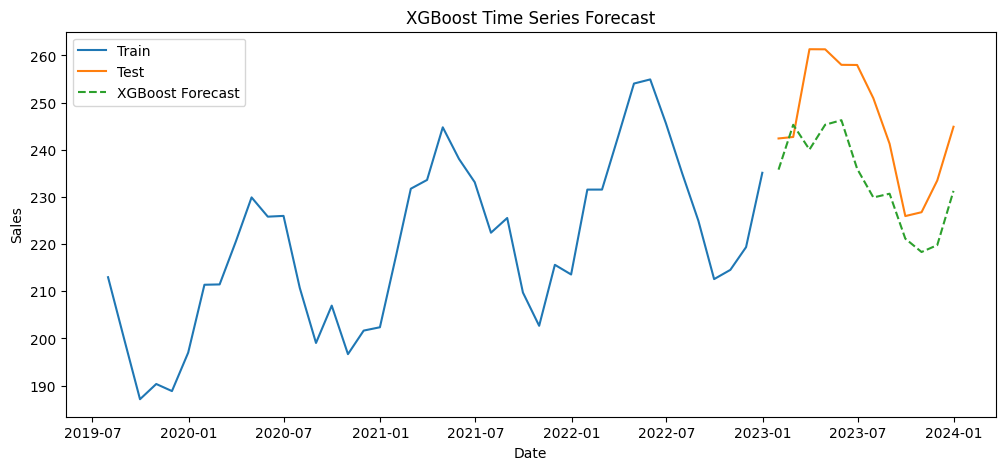


Next 12 Month Forecast:

         Date    Forecast
0  2024-01-31  231.283691
1  2024-02-29  232.829666
2  2024-03-31  235.137665
3  2024-04-30  241.959900
4  2024-05-31  238.848755
5  2024-06-30  238.313797
6  2024-07-31  237.496643
7  2024-08-31  235.472351
8  2024-09-30  234.415909
9  2024-10-31  231.441116
10 2024-11-30  222.598785
11 2024-12-31  224.406448


C:\Users\wscub\AppData\Local\Temp\ipykernel_24236\1666719811.py:123: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df_fe.index[-1] + pd.DateOffset(months=1), periods=12, freq="M")


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


np.random.seed(42)

dates = pd.date_range(start="2019-01-01", periods=5*12, freq="M")
base = 200
trend = np.linspace(0, 50, len(dates))
seasonal = 20 * np.sin(np.arange(len(dates)) * 2 * np.pi / 12)
noise = np.random.normal(0, 5, len(dates))

sales = base + trend + seasonal + noise

df = pd.DataFrame({"Date": dates, "Sales": sales})
df.set_index("Date", inplace=True)

print("Sample data head:\n", df.head(), "\n")


def create_features(data, lags=[1,2,3], windows=[3,6]):
    df_fe = data.copy()


    for lag in lags:
        df_fe[f"lag_{lag}"] = df_fe["Sales"].shift(lag)

    
    for window in windows:
        df_fe[f"roll_mean_{window}"] = df_fe["Sales"].shift(1).rolling(window).mean()
        df_fe[f"roll_std_{window}"]  = df_fe["Sales"].shift(1).rolling(window).std()

    
    df_fe["month"] = df_fe.index.month
    df_fe["year"] = df_fe.index.year

    return df_fe

df_fe = create_features(df)


df_fe = df_fe.dropna()


test_size = 12  
train = df_fe.iloc[:-test_size]
test  = df_fe.iloc[-test_size:]

X_train = train.drop("Sales", axis=1)
y_train = train["Sales"]

X_test  = test.drop("Sales", axis=1)
y_test  = test["Sales"]

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


pred_test = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, pred_test))
mae = mean_absolute_error(y_test, pred_test)

print("\nEvaluation Metrics:")
print("RMSE:", round(rmse, 2))
print("MAE :", round(mae, 2))


plt.figure(figsize=(12,5))
plt.plot(y_train.index, y_train, label="Train")
plt.plot(y_test.index, y_test, label="Test")
plt.plot(y_test.index, pred_test, label="XGBoost Forecast", linestyle="--")
plt.legend()
plt.title("XGBoost Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


future_predictions = []
last_row = df_fe.iloc[-1:].copy()  # starting point

for step in range(12):
    
    next_pred = model.predict(last_row.drop("Sales", axis=1))[0]
    future_predictions.append(next_pred)

    
    last_row["lag_3"] = last_row["lag_2"]
    last_row["lag_2"] = last_row["lag_1"]
    last_row["lag_1"] = next_pred

    
    for window in [3,6]:
        last_row[f"roll_mean_{window}"] = (
            (last_row[f"roll_mean_{window}"] * window - last_row["lag_1"] + next_pred) 
            / window
        )
        

    
    new_date = last_row.index[0] + pd.DateOffset(months=1)
    last_row.index = [new_date]
    last_row["month"] = new_date.month
    last_row["year"] = new_date.year


future_dates = pd.date_range(start=df_fe.index[-1] + pd.DateOffset(months=1), periods=12, freq="M")
future_df = pd.DataFrame({"Date": future_dates, "Forecast": future_predictions})
print("\nNext 12 Month Forecast:\n")
print(future_df)
